# L3 线性回归-编程作业


## 1.分别编写一个用广义逆和梯度下降法来求最小误差平方和最佳解的算法

1. 首先编写用广义逆来求最小误差平方和最佳解的算法。numpy中有可以直接计算广义逆的方法，故可在此直接使用。

In [579]:
import numpy as np
import matplotlib.pyplot as plt
def Generalized_Inverse(X,y):
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    X_augmented = np.array(X_augmented)
    y = np.array(y)
    return np.linalg.pinv(X_augmented).dot(y)


引入例子更好的说明上面的算法。

[ 0.88589212  0.23692946 -0.82987552]


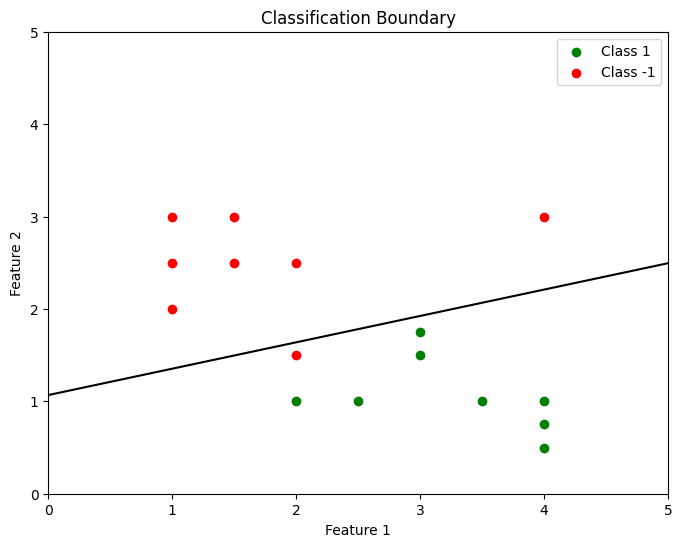

In [580]:
import numpy as np
import matplotlib.pyplot as plt
#给出示例数据，仅供参考
X_example = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
y_example = np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])
#求解
w_example = Generalized_Inverse(X_example, y_example)
#输出结果
print(w_example)
#画图
xx, yy = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
Z = w_example[0] + w_example[1] * xx + w_example[2] * yy

plt.figure(figsize=(8, 6))
plt.scatter(X_example[:8, 0], X_example[:8, 1], color='green', label='Class 1')
plt.scatter(X_example[8:, 0], X_example[8:, 1], color='red', label='Class -1')
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()



上面这段代码中，我们首先导入numpy库，然后给出矩阵A与向量b的值，接着利用np.linalg.pinv()函数求出A的广义逆，再点乘b，得到最小二乘解x。这便是利用广义逆求最小误差平方和最佳解的算法。

2. 再编写一个用梯度下降法来求最小误差平方和最佳解的算法。并通过示例将该算法可视化。

In [581]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def compute_cost(X, y, w):
    N = len(y)  # 训练样本数量
    predictions = X.dot(w)  # 使用当前参数 w 计算预测值
    square_error = (predictions - y) ** 2  # 计算平方误差
    cost = (1 / (2 * N)) * np.sum(square_error)  # 计算均方误差损失
    return cost
def gradient_descent(X,y,w,learning_rate,iterations):
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    X_augmented = np.array(X_augmented)    
    N = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X_augmented.dot(w)
        gradients = 2/N * X_augmented.T.dot(X_augmented.dot(w)-y)
        w = w - learning_rate * gradients
        cost = compute_cost(X_augmented, y, w)
        cost_history.append(cost)
    return w, cost_history


引入例子说明上述算法

[ 0.44285177  0.3244719  -0.7135521 ]


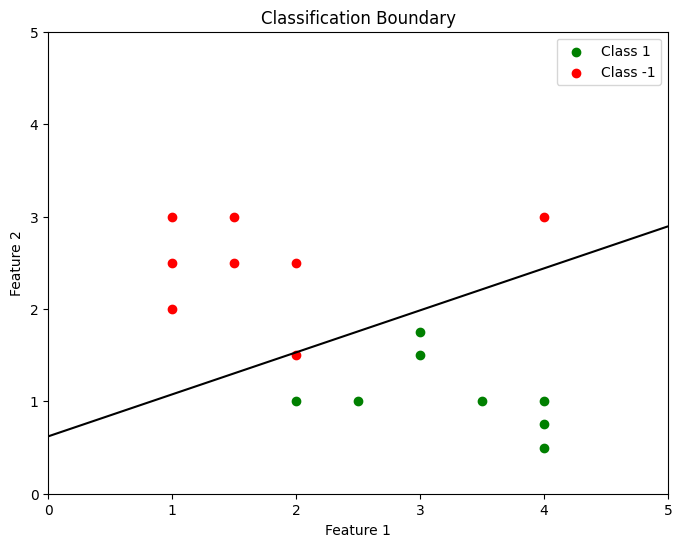

In [582]:
X_example = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
y_example = np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])
w_example = np.array([0,0,0])
learning_rate_example = 0.01
iterations_example = 1000
w_example,cost_history_example = gradient_descent(X_example,y_example,w_example,learning_rate_example,iterations_example)
print(w_example)
# for i in range(X_example.shape[0]):
#     if y_example[i] > 0:
#         plt.plot(X_example[i][0], X_example[i][1], 'o', color='green')
#     else:
#         plt.plot(X_example[i][0], X_example[i][1], 'o', color='red')
# 绘制分类面
# x_example_min, x_example_max = X_example[:, 0].min() - 1, X_example[:, 0].max() + 1
# y_example_min, y_example_max = X_example[:, 1].min() - 1, X_example[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_example_min, x_example_max, 0.01), np.arange(y_example_min, y_example_max, 0.01))
xx, yy = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
Z = w_example[0] + w_example[1] * xx + w_example[2] * yy

plt.figure(figsize=(8, 6))
plt.scatter(X_example[:8, 0], X_example[:8, 1], color='green', label='Class 1')
plt.scatter(X_example[8:, 0], X_example[8:, 1], color='red', label='Class -1')
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()

上述代码中，首先导入numpy库，然后先定义函数min_squared_error(arr),用来计算最小误差平方和(具体公式仅为示例)；再定义一个函数计算calculate_grad计算梯度(具体公式仅为示例)；然后再定义一个梯度下降算法的函数gradient_descent，固定learning每次迭代计算减去学习率乘以梯度的值，直到迭代次数达到最大值。最后，将参数代入梯度下降算法中，得到最小误差平方和最佳解。

## 2.利用上述算法求解下列问题
1. 产生两个都具有200个二维向量的数据集X_1和X_2。数据集X_1的样本来自均值向量〖m_1=[-5,0]〗^T 、协方差矩阵s_1=I的正态分布，属于“+1”类，数据集X_2的样本来自均值向量〖m_2=[0,5]〗^T、协方差矩阵s_2=I的正态分布，属于“-1”类，其中 是一个2*2的单位矩阵。产生的数据中80%用于训练，20%用于测试。

In [583]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[ 1.23254165e+00,  6.28825431e+00],
        [-4.14263804e+00, -1.50618929e+00],
        [-8.01839182e-01,  3.11499129e+00],
        [ 2.01632682e-01,  6.27144327e+00],
        [-1.01157614e+00,  5.49898375e+00],
        [-4.35362247e+00,  3.24305653e-01],
        [ 1.01772549e+00,  3.71713022e+00],
        [-4.86046853e+00,  2.85469369e-01],
        [-6.10048975e+00, -1.15725754e+00],
        [-7.02165089e+00, -1.24092055e+00],
        [-4.94313257e+00, -1.94607185e+00],
        [-5.70418876e+00, -1.77856397e+00],
        [-4.24647832e+00,  3.63464594e-01],
        [-2.26532793e-01,  5.50237529e+00],
        [ 1.09485850e+00,  5.10846574e+00],
        [ 5.53862642e-02,  4.69377118e+00],
        [ 1.31239964e-01,  4.48178809e+00],
        [ 7.83296539e-01,  3.69896795e+00],
        [-2.81189223e-01,  5.51578489e+00],
        [-5.93042584e+00, -6.45760879e-02],
        [ 1.06051012e-01,  3.99401144e+00],
        [-9.22850862e-01,  3.48173234e+00],
        [-4.61620988e+00,  1.124

2. 用上述算法求解,利用产生的两个训练样本集得到分类面，各类超参数自定.
3. 统计各训练集上测试集上的分类准确率。
4. 画出数据集和分类面的图像

设定第二大题中各小题均使用以下参数：
```python
learning_rate = 0.01
iterations = 1000 #epoch = 1000
```
同时设定各小题均使用上面生成的数据集X_train,X_test,以及对应的标签y_train,y_test。
- 首先使用广义逆求解最小误差平方和最佳解,并将结果可视化.首先展示在训练集上的表现。

[ 0.07250137 -0.16371447 -0.20580167]


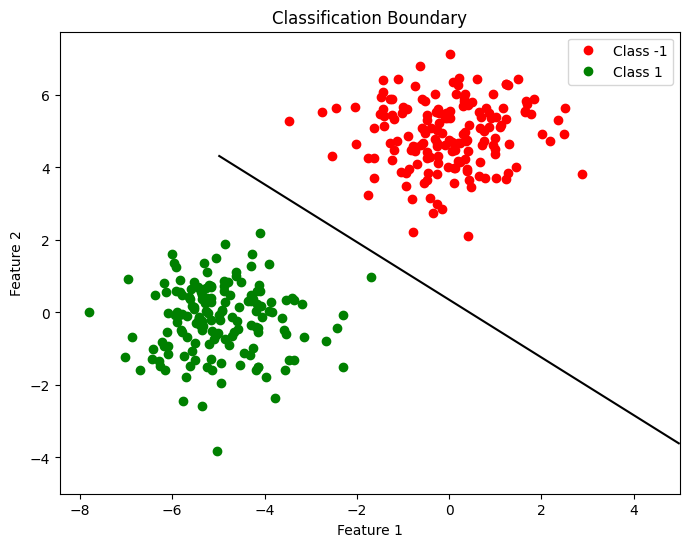

In [584]:
w_train1 = Generalized_Inverse(X_train, y_train)
print(w_train1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train1[0] + w_train1[1] * xx + w_train1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()

可见在当前条件下，利用广义逆求解时，在训练集上准确率达到100%。得到的分类面权向量为[ 0.07250137 -0.16371447 -0.20580167]，绘制出的分类面如上图所示。

- 再展现在测试集上的表现。

[ 0.03830106 -0.18374016 -0.1832292 ]


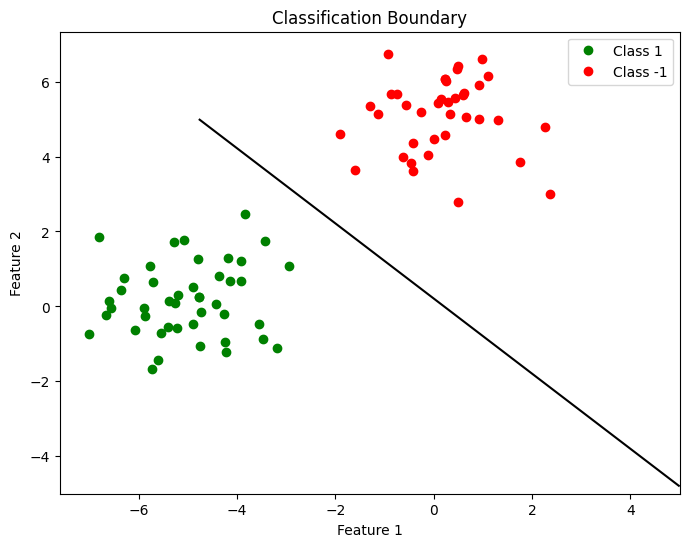

In [585]:
w_test1 = Generalized_Inverse(X_test, y_test)
print(w_test1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test1[0] + w_test1[1] * xx + w_test1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()

可见在当前条件下，利用广义逆求解时，在测试集上准确率达到100%。得到的分类面权向量为[ 0.03830106 -0.18374016 -0.1832292 ]
，绘制出的分类面如上图所示。

- 再利用梯度下降法求解最小误差平方和最佳解,并将结果可视化。首先展示在训练集上的表现。

[ 0.05326879 -0.16741528 -0.20214265]


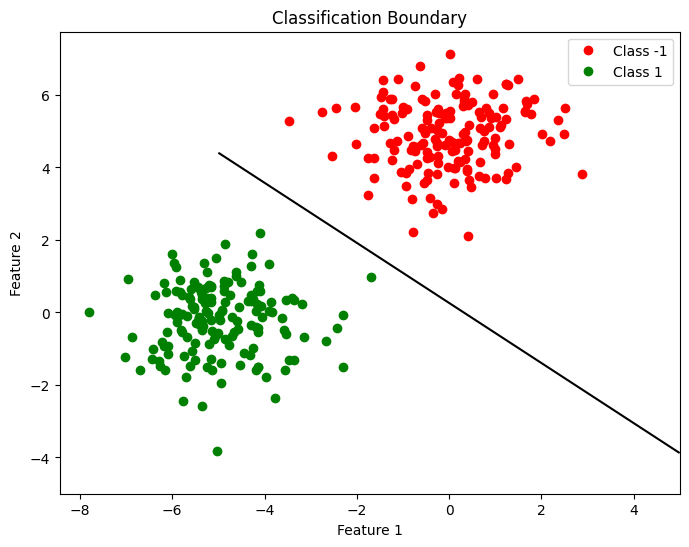

In [586]:
learning_rate = 0.01
iterations = 1000
w_train2 = np.array([0,0,0])
w_train2,cost_history_train = gradient_descent(X_train,y_train,w_train2,learning_rate,iterations)
print(w_train2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train2[0] + w_train2[1] * xx + w_train2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


可见在当前条件下，利用梯度下降法求解时，在训练集上准确率达到100%。得到的分类面权向量为[ 0.05326879 -0.16741528 -0.20214265]
，绘制出的分类面如上图所示。

- 再观测其在测试集上的表现

[ 0.02752629 -0.18568045 -0.18118433]


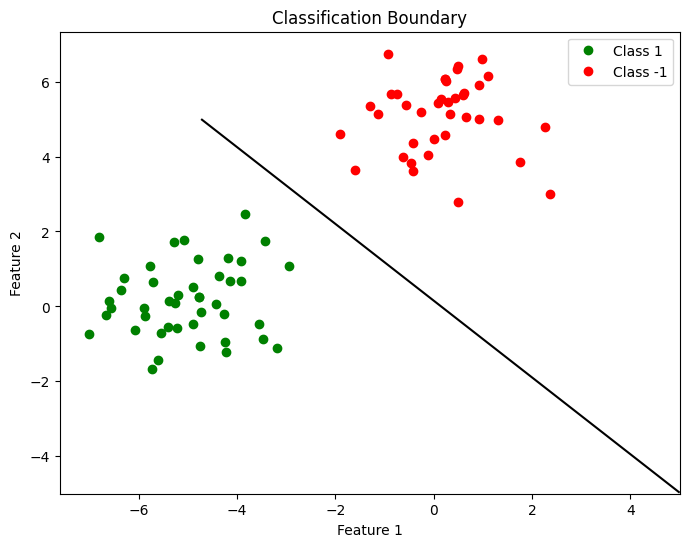

In [587]:
w_test2 = np.array([0,0,0])
learning_rate = 0.01
iterations = 1000
w_test2,cost_history_test = gradient_descent(X_test,y_test,w_test2,learning_rate,iterations)
print(w_test2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test2[0] + w_test2[1] * xx + w_test2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()    



可见在当前条件下，利用梯度下降法求解时，在测试集上准确率达到100%。得到的分类面权向量为[ 0.02752629 -0.18568045 -0.18118433]
，绘制出的分类面如上图所示。

5. 下面分别画出了在训练集上和测试集上损失函数随epoch增加的变化曲线，并标记出变化较大的前六次迭代的损失函数值。先分别解释epoch,batch和iteration的释义，也是作为学习的记录：
    - **epoch** :使用训练集的所有数据对模型进行一次完整的训练
    - **batch** :使用训练集中的一小部分样本对模型权重进行一次更新，这一批样本的数据数量由batch_size决定
    - **iteration** :使用一个Batch数据对模型进行一次参数更新的过程
这里，由于在上面的代码中，没有特意设置batch_size，每次都将训练集的所有数据代入训练，所以每进行一次迭代即代表一个epoch，故可绘制如下图像

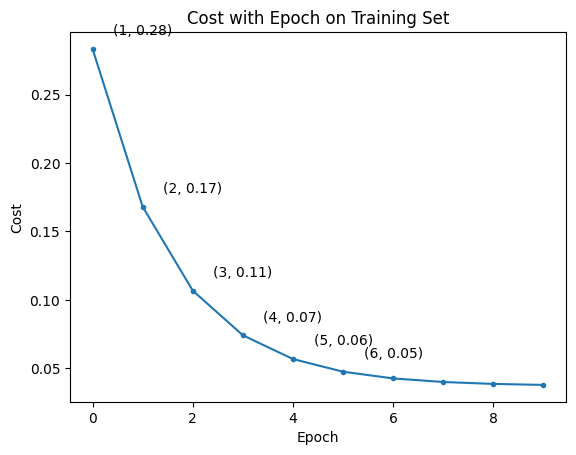

In [588]:
# 在训练集上绘制损失值随 epoch 变化的曲线
cost_first_10_epochs = cost_history_train[:10]
plt.plot(range(10), cost_first_10_epochs, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Training Set')
n = 6
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_train[i]:.2f})', (i + 1, cost_history_train[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

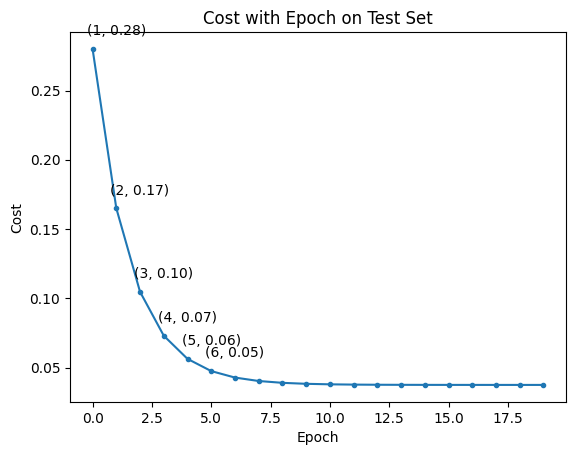

In [589]:
# 在测试集上绘制损失值随 epoch 变化的曲线
cost_first_20_epochs2 = cost_history_test[:20]
plt.plot(range(20), cost_first_20_epochs2, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Test Set')
n = 6
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_test[i]:.2f})', (i + 1, cost_history_test[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

## 题3 替换数据集重复2中内容

根据题目要求，我们将数据集替换为数据集X_1和数据集X_2的均值向量分别改为〖m_1=[1,0]〗^T和〖m_2=[0,1]〗^T，其余不变

In [590]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(60)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([1,0])  #第一类样本的区间
interval_2 = np.array([0,1])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[-2.20676287e+00,  3.26867302e-01],
        [ 2.11886785e+00,  9.32145138e-01],
        [-8.37684193e-01,  1.20222728e+00],
        [ 8.38305018e-01,  2.36553836e+00],
        [-9.05496688e-01,  2.50099317e+00],
        [ 1.14601634e+00, -1.40891319e+00],
        [-8.91694426e-02,  2.68268324e+00],
        [ 2.31209035e+00,  9.43398144e-01],
        [ 1.63843363e+00, -1.01792839e+00],
        [ 7.77511098e-01,  8.08890256e-01],
        [ 4.97419709e-01, -4.55048453e-01],
        [ 1.43646998e+00, -5.39563879e-01],
        [ 1.38605227e+00, -1.09707518e+00],
        [-5.51918172e-01,  1.08740217e+00],
        [ 8.55868628e-01,  2.82328654e+00],
        [ 9.38308084e-02, -9.24112931e-01],
        [-1.07415974e+00,  8.79882993e-01],
        [ 1.10851638e+00,  2.42204895e+00],
        [-1.23533614e+00,  1.48771821e+00],
        [-2.73626755e-01, -8.15137009e-01],
        [-8.50447992e-01,  1.33782443e+00],
        [ 1.68382408e+00,  1.05134051e+00],
        [-1.84195765e-02,  1.430

2. 用上述算法求解,利用产生的两个训练样本集得到分类面，各类超参数自定.
3. 统计各训练集上测试集上的分类准确率。
4. 画出数据集和分类面的图像

设定第三大题中各小题均使用以下参数：
```python
learning_rate = 0.01
iterations = 1000 #epoch = 1000
```
同时设定各小题均使用上面生成的数据集X_train,X_test,以及对应的标签y_train,y_test。
- 首先使用广义逆求解最小误差平方和最佳解,并将结果可视化.首先展示在训练集上的表现。

[-0.01842841  0.32620253 -0.29394766]


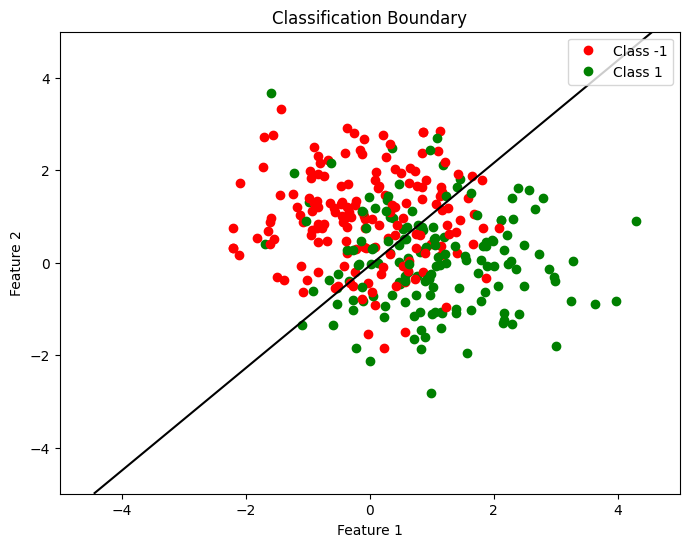

In [591]:
w_train1 = Generalized_Inverse(X_train, y_train)
print(w_train1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train1[0] + w_train1[1] * xx + w_train1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()

再编写统计分类正确率的函数accuracy_score。

In [592]:
def accuracy_score(X,y,w):
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    X_augmented = np.array(X_augmented)
    y = np.array(y)
    y_pred = np.sign(X_augmented.dot(w))
    return np.sum(y_pred == y) / len(y)

In [593]:
accuracy_train1 = accuracy_score(X_train,y_train,w_train1)
print(accuracy_train1)

0.740625


可见在当前条件下，利用广义逆求解时，在训练集上准确率达到74.06%。绘制出的分类面如上图所示。

- 再展现在测试集上的表现。

[ 0.21201437  0.20569694 -0.50721958]


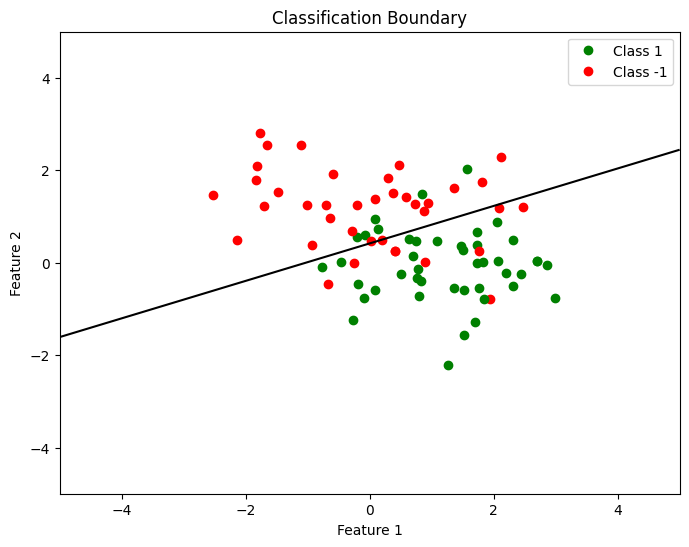

In [594]:
w_test1 = Generalized_Inverse(X_test, y_test)
print(w_test1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test1[0] + w_test1[1] * xx + w_test1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()

In [595]:
accuracy_test1 = accuracy_score(X_test,y_test,w_test1)
print(accuracy_test1)

0.8125


可见在当前条件下，利用广义逆求解时，在测试集上准确率达到81.25%。绘制出的分类面如上图所示。

- 再利用梯度下降法求解最小误差平方和最佳解,并将结果可视化。首先展示在训练集上的表现。

[-0.01842792  0.32620229 -0.29394792]


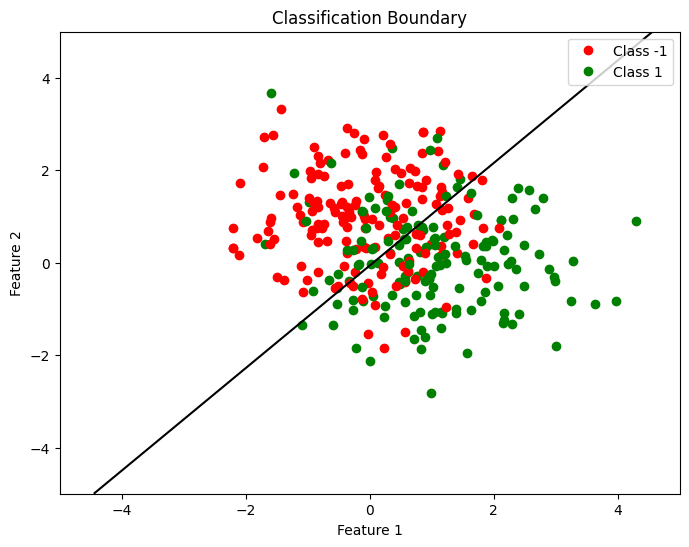

In [596]:
learning_rate = 0.01
iterations = 1000
w_train2 = np.array([0,0,0])
w_train2,cost_history_train = gradient_descent(X_train,y_train,w_train2,learning_rate,iterations)
print(w_train2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train2[0] + w_train2[1] * xx + w_train2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


In [597]:
accuracy_train2 = accuracy_score(X_train,y_train,w_train2)
print(accuracy_train2)

0.740625


可见在当前条件下，利用梯度下降法求解时，在训练集上准确率达到74.06%。绘制出的分类面如上图所示。

- 再观测其在测试集上的表现

[ 0.21188873  0.20575371 -0.50713617]


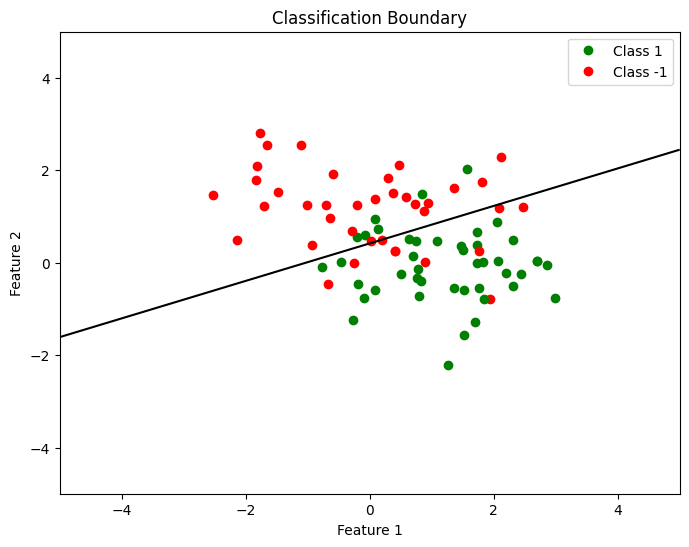

In [598]:
w_test2 = np.array([0,0,0])
learning_rate = 0.01
iterations = 1000
w_test2,cost_history_test = gradient_descent(X_test,y_test,w_test2,learning_rate,iterations)
print(w_test2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test2[0] + w_test2[1] * xx + w_test2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()    



In [599]:
accuracy_test2 = accuracy_score(X_test,y_test,w_test2)
print(accuracy_test2)

0.8125


可见在当前条件下，利用梯度下降法求解时，在测试集上准确率达到81.25%。绘制出的分类面如上图所示。

5. 下面分别画出了在训练集上和测试集上损失函数随epoch增加的变化曲线，并标记出变化较大的前六次迭代的损失函数值。

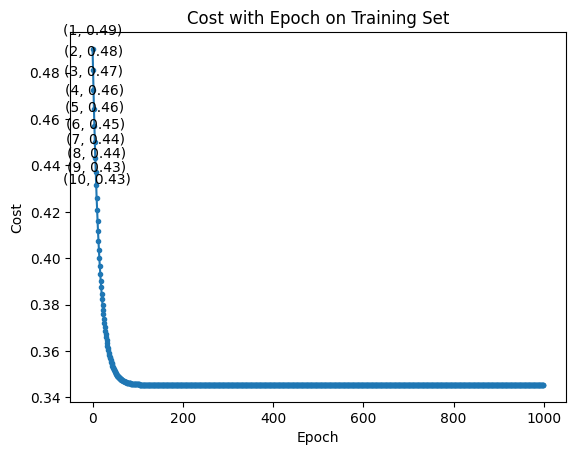

In [600]:
# 在训练集上绘制损失值随 epoch 变化的曲线
plt.plot(range(iterations), cost_history_train, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Training Set')
n = 10
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_train[i]:.2f})', (i + 1, cost_history_train[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

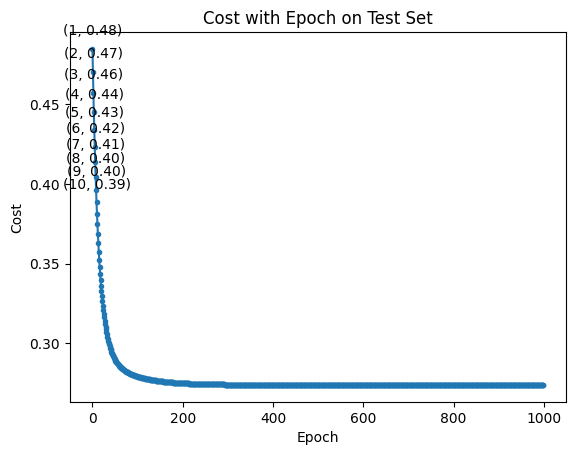

In [601]:
# 在测试集上绘制损失值随 epoch 变化的曲线
plt.plot(range(iterations), cost_history_test, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Test Set')
n = 10
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_test[i]:.2f})', (i + 1, cost_history_test[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

## 题4 改变超参量、样本数量、样本分布、batch_size、epoch次数等，研究规律

产生两个都具有200个二维向量的数据集X_1和X_2。数据集X_1的样本来自均值向量〖m_1=[-5,0]〗^T 、协方差矩阵s_1=I的正态分布，属于“+1”类，数据集X_2的样本来自均值向量〖m_2=[0,5]〗^T、协方差矩阵s_2=I的正态分布，属于“-1”类，其中 是一个2*2的单位矩阵。产生的数据中80%用于训练，20%用于测试。

In [602]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[ 1.23254165e+00,  6.28825431e+00],
        [-4.14263804e+00, -1.50618929e+00],
        [-8.01839182e-01,  3.11499129e+00],
        [ 2.01632682e-01,  6.27144327e+00],
        [-1.01157614e+00,  5.49898375e+00],
        [-4.35362247e+00,  3.24305653e-01],
        [ 1.01772549e+00,  3.71713022e+00],
        [-4.86046853e+00,  2.85469369e-01],
        [-6.10048975e+00, -1.15725754e+00],
        [-7.02165089e+00, -1.24092055e+00],
        [-4.94313257e+00, -1.94607185e+00],
        [-5.70418876e+00, -1.77856397e+00],
        [-4.24647832e+00,  3.63464594e-01],
        [-2.26532793e-01,  5.50237529e+00],
        [ 1.09485850e+00,  5.10846574e+00],
        [ 5.53862642e-02,  4.69377118e+00],
        [ 1.31239964e-01,  4.48178809e+00],
        [ 7.83296539e-01,  3.69896795e+00],
        [-2.81189223e-01,  5.51578489e+00],
        [-5.93042584e+00, -6.45760879e-02],
        [ 1.06051012e-01,  3.99401144e+00],
        [-9.22850862e-01,  3.48173234e+00],
        [-4.61620988e+00,  1.124

在上述二题的基础上，我们在下面代码中分别修改超参量、样本数量、样本分布、batch_size、epoch次数等，研究这些改变带来的影响。
- 首先，我们将超参量learning_rate改为0.001，iterations改为10000，即epoch改为10000，其余不变，对于广义逆法没有产生影响，对于梯度下降法，我们得到如下结果：

[ 0.05325286 -0.16741835 -0.20213962]


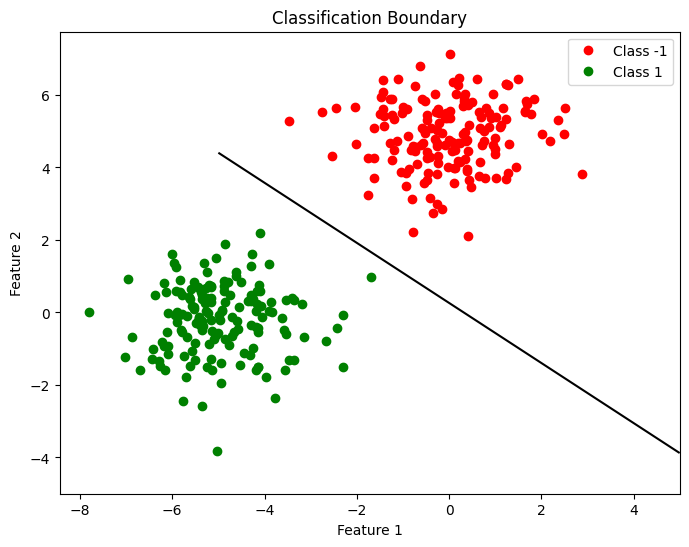

In [603]:
learning_rate = 0.001
iterations = 10000
w_train2 = np.array([0,0,0])
w_train2,cost_history_train = gradient_descent(X_train,y_train,w_train2,learning_rate,iterations)
print(w_train2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train2[0] + w_train2[1] * xx + w_train2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


可见在当前条件下，利用梯度下降法求解时，在训练集上准确率达到100%。绘制出的分类面如上图所示。

- 再观测其在测试集上的表现

[ 0.02751877 -0.1856818  -0.1811829 ]


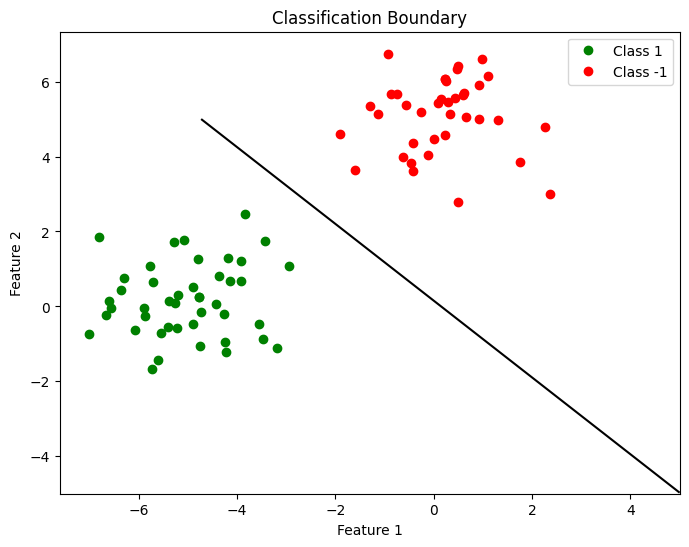

In [604]:
w_test2 = np.array([0,0,0])
learning_rate = 0.001
iterations = 10000
w_test2,cost_history_test = gradient_descent(X_test,y_test,w_test2,learning_rate,iterations)
print(w_test2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test2[0] + w_test2[1] * xx + w_test2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()    



可见在当前条件下，利用梯度下降法求解时，在测试集上准确率达到100%。绘制出的分类面如上图所示。

1. 下面分别画出了在训练集上和测试集上损失函数随epoch增加的变化曲线，并标记出变化较大的前六次迭代的损失函数值.
这里，由于在上面的代码中，没有特意设置batch_size，每次都将训练集的所有数据代入训练，所以每进行一次迭代即代表一个epoch，故可绘制如下图像

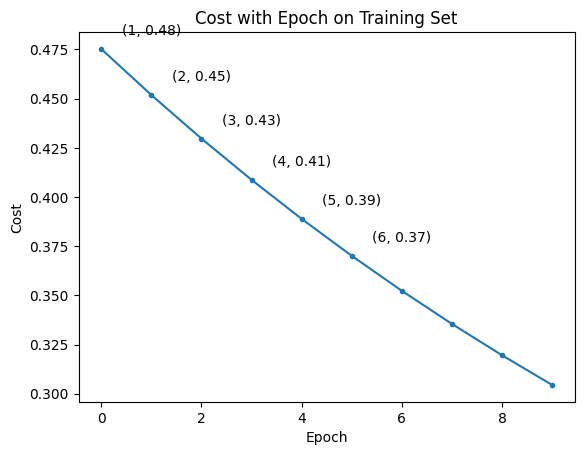

In [605]:
# 在训练集上绘制损失值随 epoch 变化的曲线
cost_first_10_epochs = cost_history_train[:10]
plt.plot(range(10), cost_first_10_epochs, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Training Set')
n = 6
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_train[i]:.2f})', (i + 1, cost_history_train[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

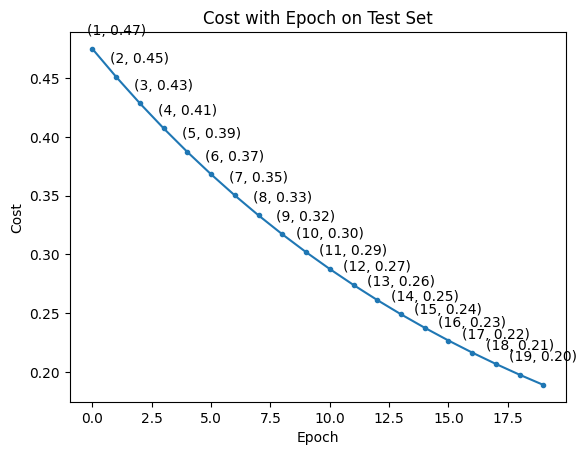

In [606]:
# 在测试集上绘制损失值随 epoch 变化的曲线
cost_first_20_epochs2 = cost_history_test[:20]
plt.plot(range(20), cost_first_20_epochs2, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Test Set')
n =20
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_test[i]:.2f})', (i + 1, cost_history_test[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

观察上图可知，当epoch达到一定数量时，损失函数不再发生明显变化，learning_rate减小时，损失函数下降的速度变慢，但是最终的损失函数值仍然是一样的，这是因为当learning_rate减小时，每次迭代更新的步长变小，而在达到一定数量的迭代次数后，损失函数不再发生明显变化。

- 修改样本数量，将样本数量改为2000，其余不变，对于广义逆和梯度下降法，我们分别得到如下结果：

In [607]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 1000                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(1600, 2) (1600,)
(400, 2) (400,)


(array([[ 0.46141985,  3.98001253],
        [-0.79887474,  5.25563704],
        [-0.51095077,  5.99572913],
        ...,
        [-6.32188497, -0.55504883],
        [-5.36035981,  0.74582122],
        [-1.24538453,  3.11158285]]),
 array([-1., -1., -1., ...,  1.,  1., -1.]))

[ 0.02257024 -0.18088391 -0.18794302]


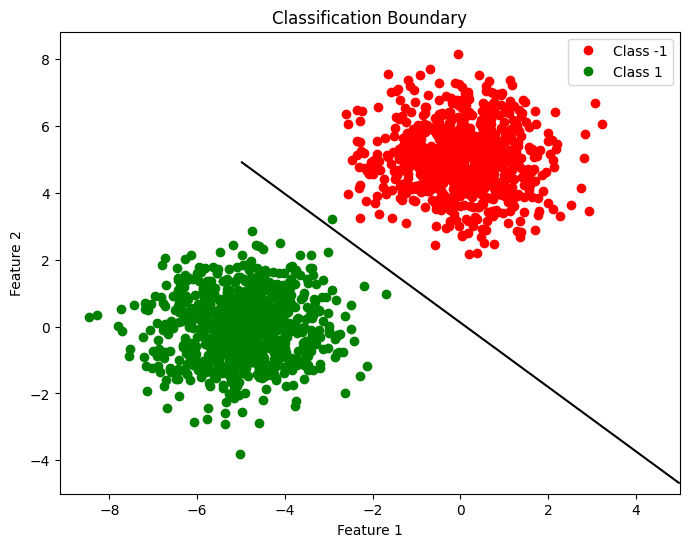

In [608]:
w_train1 = Generalized_Inverse(X_train, y_train)
print(w_train1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train1[0] + w_train1[1] * xx + w_train1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()


[ 0.03135073 -0.17523361 -0.1898051 ]


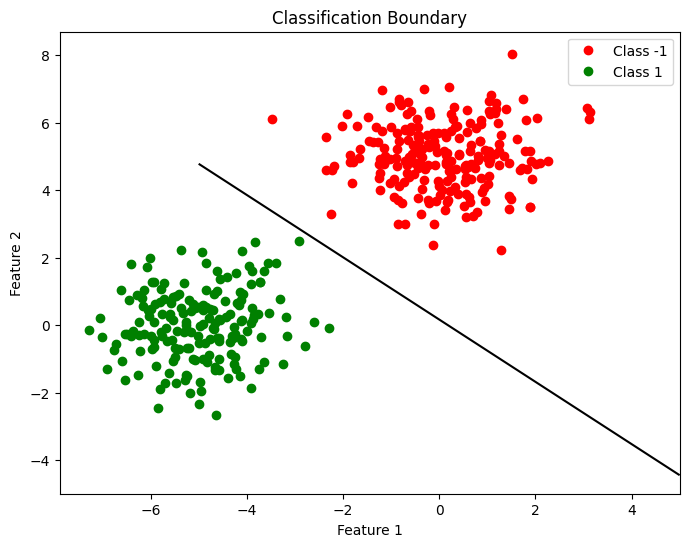

In [609]:
w_test1 = Generalized_Inverse(X_test, y_test)
print(w_test1)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test1[0] + w_test1[1] * xx + w_test1[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()


[ 0.01699606 -0.18192733 -0.1869131 ]


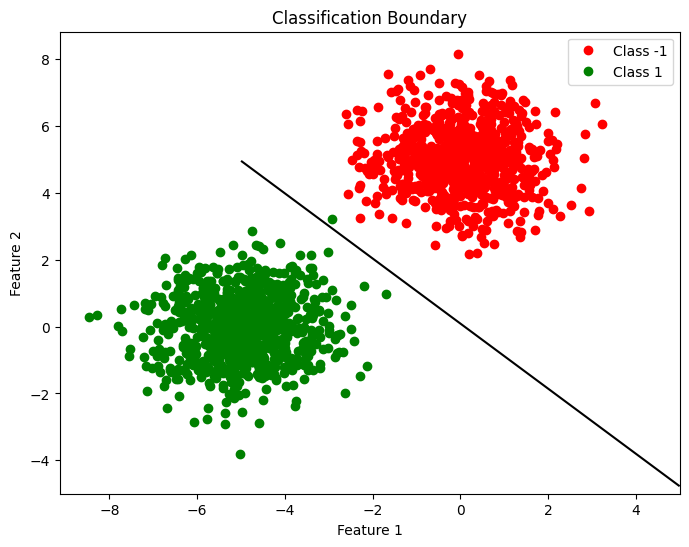

In [610]:
learning_rate = 0.01
iterations = 1000
w_train2 = np.array([0,0,0])
w_train2,cost_history_train = gradient_descent(X_train,y_train,w_train2,learning_rate,iterations)
print(w_train2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train2[0] + w_train2[1] * xx + w_train2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


[ 0.02277546 -0.17681337 -0.18818586]


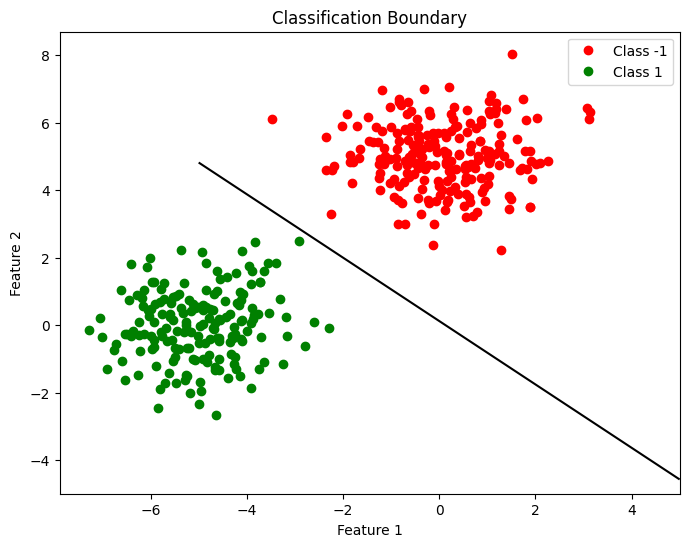

In [611]:
w_test2 = np.array([0,0,0])
learning_rate = 0.01
iterations = 1000
w_test2,cost_history_test = gradient_descent(X_test,y_test,w_test2,learning_rate,iterations)
print(w_test2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test2[0] + w_test2[1] * xx + w_test2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show()    



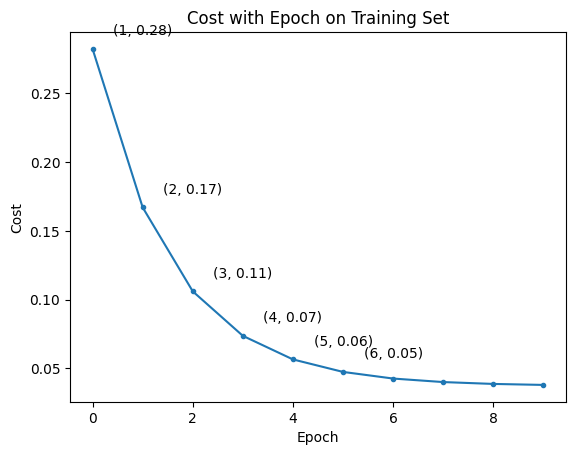

In [612]:
# 在训练集上绘制损失值随 epoch 变化的曲线
cost_first_10_epochs = cost_history_train[:10]
plt.plot(range(10), cost_first_10_epochs, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Training Set')
n = 6
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_train[i]:.2f})', (i + 1, cost_history_train[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

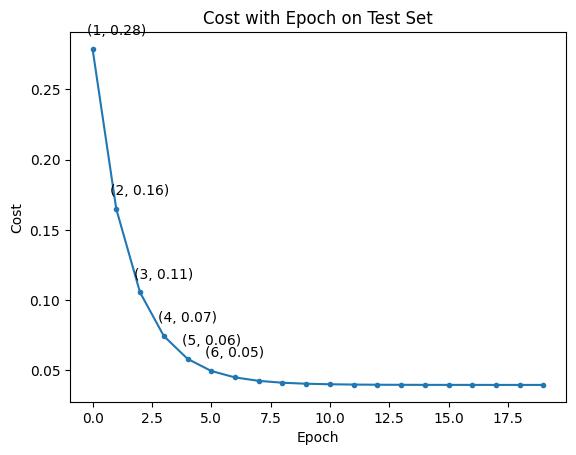

In [613]:
# 在测试集上绘制损失值随 epoch 变化的曲线
cost_first_20_epochs2 = cost_history_test[:20]
plt.plot(range(20), cost_first_20_epochs2, marker='o',markersize=3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with Epoch on Test Set')
n = 6
for i in range(n):
    plt.annotate(f'({i + 1}, {cost_history_test[i]:.2f})', (i + 1, cost_history_test[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

可以发现，在一定范围内，样本数量的增加对于分类面的影响不大。

- 修改batch值，将batch_size改为20，其余不变，对于梯度下降法，我们分别得到如下结果：

In [614]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[ 1.23254165e+00,  6.28825431e+00],
        [-4.14263804e+00, -1.50618929e+00],
        [-8.01839182e-01,  3.11499129e+00],
        [ 2.01632682e-01,  6.27144327e+00],
        [-1.01157614e+00,  5.49898375e+00],
        [-4.35362247e+00,  3.24305653e-01],
        [ 1.01772549e+00,  3.71713022e+00],
        [-4.86046853e+00,  2.85469369e-01],
        [-6.10048975e+00, -1.15725754e+00],
        [-7.02165089e+00, -1.24092055e+00],
        [-4.94313257e+00, -1.94607185e+00],
        [-5.70418876e+00, -1.77856397e+00],
        [-4.24647832e+00,  3.63464594e-01],
        [-2.26532793e-01,  5.50237529e+00],
        [ 1.09485850e+00,  5.10846574e+00],
        [ 5.53862642e-02,  4.69377118e+00],
        [ 1.31239964e-01,  4.48178809e+00],
        [ 7.83296539e-01,  3.69896795e+00],
        [-2.81189223e-01,  5.51578489e+00],
        [-5.93042584e+00, -6.45760879e-02],
        [ 1.06051012e-01,  3.99401144e+00],
        [-9.22850862e-01,  3.48173234e+00],
        [-4.61620988e+00,  1.124

In [615]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def compute_cost(X, y, w):
    N = len(y)  # 训练样本数量
    predictions = X.dot(w)  # 使用当前参数 w 计算预测值
    square_error = (predictions - y) ** 2  # 计算平方误差
    cost = (1 / (2 * N)) * np.sum(square_error)  # 计算均方误差损失
    return cost
def gradient_descent_2(X,y,w,learning_rate,iterations,batch_size):
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    X_augmented = np.array(X_augmented)    
    N = len(y)
    cost_history = []
    for i in range(iterations):
        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_augmented[indices]
        y_batch = y[indices]
        predictions = X_batch.dot(w)
        gradients = (1/batch_size) * X_batch.T.dot(X_batch.dot(w)-y_batch)
        w = w - learning_rate * gradients
        cost = compute_cost(X_augmented, y, w)
        cost_history.append(cost)
    return w, cost_history


在训练集上：

[ 0.02793327 -0.17077726 -0.1999661 ]


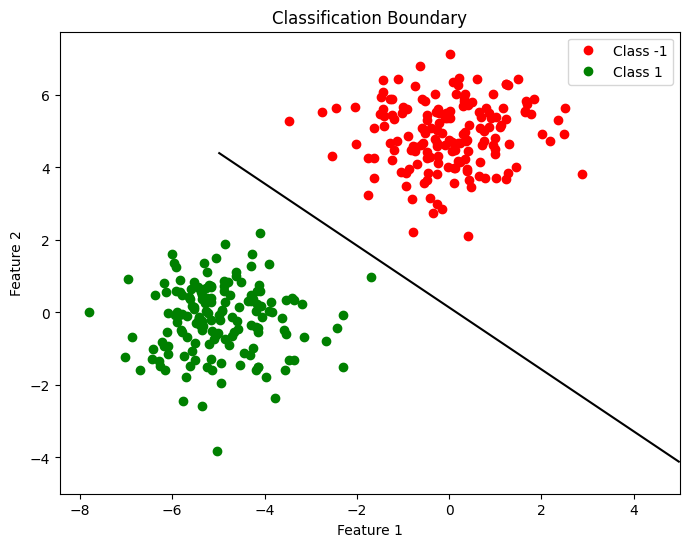

In [616]:
learning_rate = 0.01
iterations = 1000
batch_size = 20
w_train2 = np.array([0,0,0])
w_train2,cost_history_train = gradient_descent_2(X_train,y_train,w_train2,learning_rate,iterations,batch_size)
print(w_train2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train2[0] + w_train2[1] * xx + w_train2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


在测试集上：

[ 0.01940024 -0.19343306 -0.17956719]


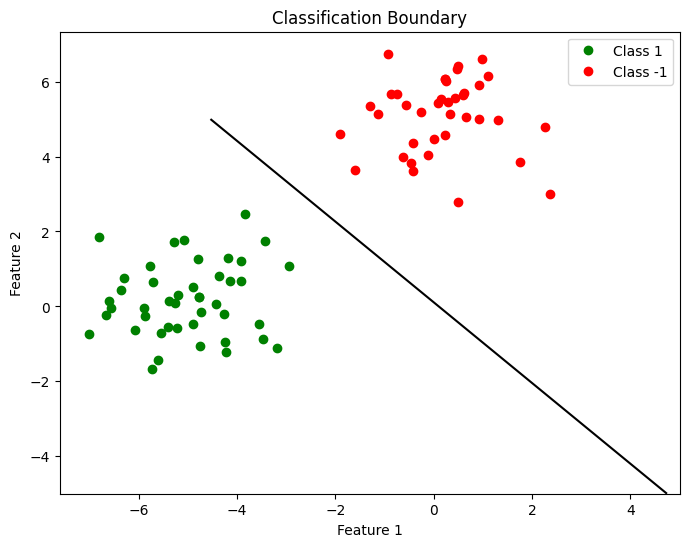

In [617]:
learning_rate = 0.01
iterations = 1000
batch_size = 20
w_test2 = np.array([0,0,0])
w_test2,cost_history_test = gradient_descent_2(X_test,y_test,w_test2,learning_rate,iterations,batch_size)
print(w_test2)
#画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test2[0] + w_test2[1] * xx + w_test2[2] * yy
label_added_green = False
label_added_red = False
plt.figure(figsize=(8, 6))
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')
plt.show() 


设置合适的batch_size可以使得训练速度加快，同时增强模型的泛化性，引入随机性，使得模型不容易陷入局部最优。

## 题5 对题给单变量函数进行分析

**题目要求** 中所给的单变量函数为f(x)=x*cos⁡(0.25π*x)，分别用梯度下降法、随机梯度下降法、Adagrad、RMSProp、动量法（Momentum）和Adam共6种方法，编写程序画图呈现x从初始值为-4、迭代10次时x及f(x)的每次变化情况，这里对所有算法学习率（或初始学习率）均为0.4，为防止分母为0时给的最小量为ε=1e-6，RMSProp算法的α=0.9，动量法的λ=0.9，Adam的beta1=0.9，beta2=0.999，观察不同算法的变化情况体会各自的差异。
1. 梯度下降法

In [618]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
#梯度下降法函数
def gradient_descent(func, dfunc, x_init, learning_rate, iterations):
    x = x_init
    x_history = []
    func_history = []
    epsilon = 1e-6
    for i in range(iterations):
        x_history.append(x)
        func_history.append(func(x))
        gradient = dfunc(x)
        x = x - learning_rate * gradient
        if np.abs(gradient) < epsilon:
            break
    return x, x_history, func_history


上述代码中，首先导入numpy库，然后定义函数f(x)和其导数df(x)，接着定义梯度下降算法gradient_descent，固定learning每次迭代计算减去学习率乘以梯度的值，直到迭代次数达到最大值或者损失函数值小于阈值。下面代入题述条件，得到的结果如下图所示。

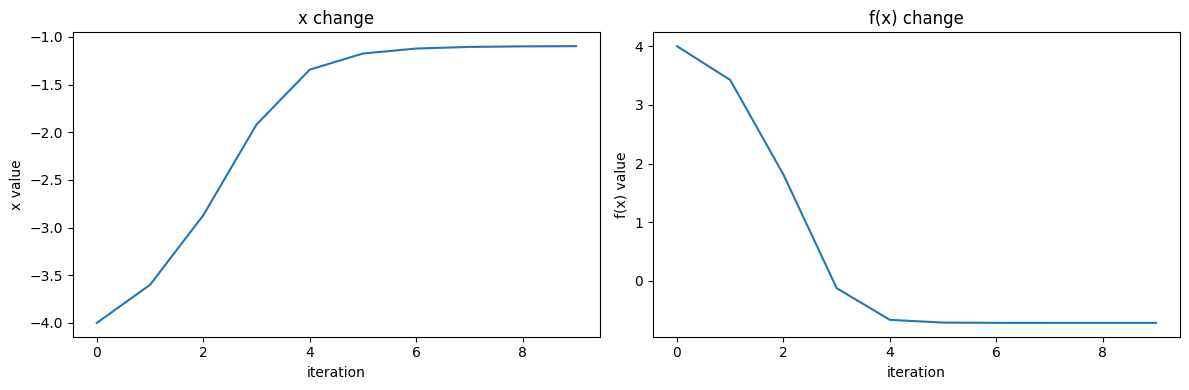

In [619]:
x_init = -4
learning_rate = 0.4
iterations = 10
x_final, x_history, func_history = gradient_descent(func, derivative_func, x_init, learning_rate, iterations)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, label='x')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history, label='f(x)')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()

绘图时导入matplotlib库，使用plt.subplot()函数将两个图像绘制在同一张图上，其中左图为x的变化情况，右图为f(x)的变化情况，使结果直观明显。

2. 随机梯度下降法

In [620]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
def random_gradient_descent(learning_rate,iterations):
    x = -4
    x_history = []
    func_history = []
    epsilon = 1e-6
    for i in range(iterations):
        gradient = derivative_func(x)
        x = x - learning_rate * gradient + np.random.normal(0, epsilon)
        x_history.append(x)
        func_history.append(func(x))
    return x, x_history, func_history

上述代码中大致部分与梯度下降法相同，不同的是在梯度下降法的基础上，每次迭代时随机选取一个样本代入梯度下降算法中，得到的结果如下图所示。

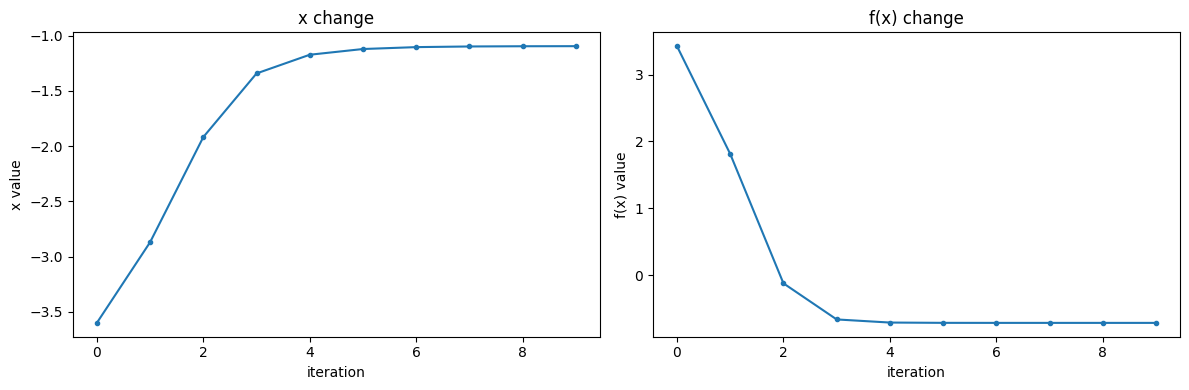

In [621]:
x_init = -4
learning_rate = 0.4
iterations = 10
x_final, x_history, func_history = random_gradient_descent(learning_rate,iterations)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()


3. Adagrad法

In [622]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
def Adagrad(learning_rate,iterations):
    x_init = -4
    x = x_init
    x_history = []
    func_history = []
    epsilon = 1e-6
    grad_squared_sum = 0
    for i in range(iterations):
        gradient = -derivative_func(x)
        grad_squared_sum += gradient ** 2
        adjusted_learning_rate = learning_rate / np.sqrt(grad_squared_sum + epsilon)
        x = x + adjusted_learning_rate * gradient
        x_history.append(x)
        func_history.append(func(x))
    return x, x_history, func_history
    

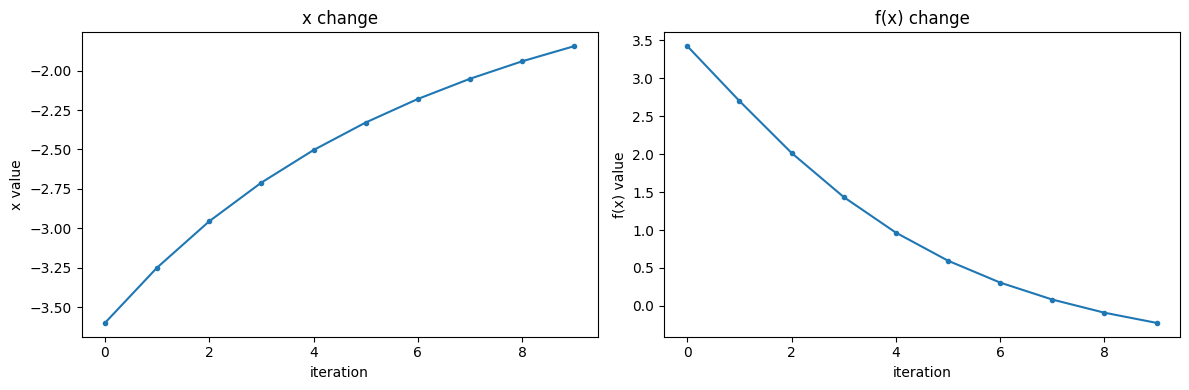

In [623]:
learning_rate = 0.4
iterations = 10
x_final, x_history, func_history = Adagrad(learning_rate,iterations)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()

4. RMSProp法

In [624]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
def RMSprop(x_init,learning_rate,decay_rate,iterations):
    x = x_init
    x_history = []
    func_history = []
    epsilon = 1e-6
    grad_squared_sum = 0
    for i in range(iterations):
        gradient = derivative_func(x)
        if i == 0: 
            grad_squared_sum += gradient ** 2
        else:
            grad_squared_sum = decay_rate*grad_squared_sum + (1-decay_rate)*gradient**2
        adjusted_learning_rate = learning_rate / np.sqrt(grad_squared_sum + epsilon)
        x -= adjusted_learning_rate*gradient
        x_history.append(x)
        func_history.append(func(x))
    return x, x_history, func_history


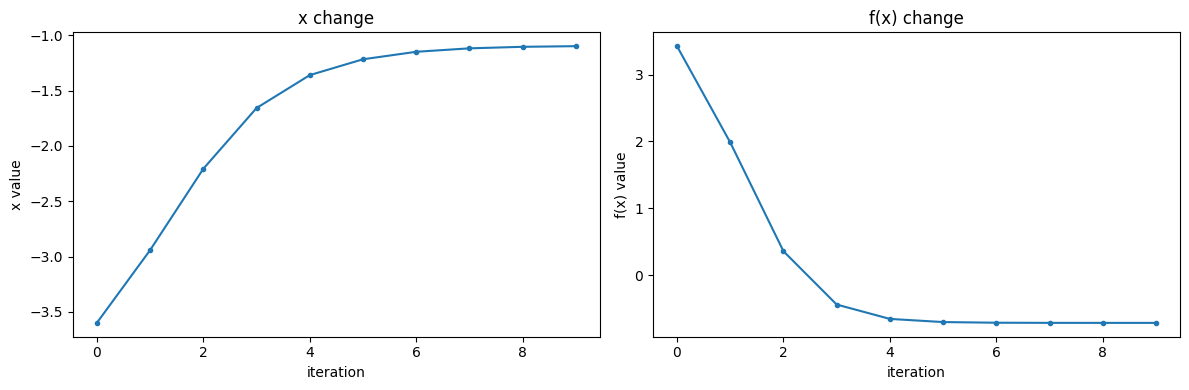

In [625]:
learning_rate = 0.4
iterations = 10
alpha = 0.9
x_init = -4
x_final, x_history, func_history = RMSprop(x_init,learning_rate,alpha,iterations)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()

5. 动量法

In [626]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
def momentum(x_init,learning_rate,iterations,momentum_rate):
    x = x_init
    x_history = []
    func_history = []
    epsilon = 1e-6
    v = 0
    for i in range(iterations):
        gradient = derivative_func(x)
        v = momentum_rate*v-learning_rate*gradient
        x += v
        x_history.append(x)
        func_history.append(func(x))
    return x, x_history, func_history

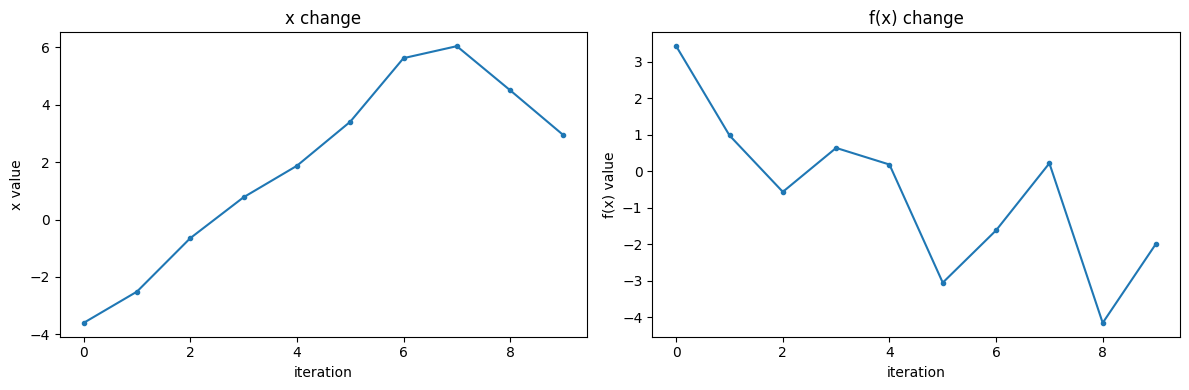

In [627]:
learning_rate = 0.4
iterations = 10
momentum_rate = 0.9
x_init = -4
x_final, x_history, func_history = momentum(x_init,learning_rate,iterations,momentum_rate)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()

6. Adam法

In [628]:
import numpy as np
import matplotlib.pyplot as plt
#定义函数
def func(x):
    return x*np.cos(0.25*np.pi*x)
#对应函数导数
def derivative_func(x):
    return np.cos(0.25*np.pi*x)-0.25*np.pi*x*np.sin(0.25*np.pi*x)
def Adam(x_init,learning_rate,iterations,beta1,beta2):
    x = x_init
    x_history = []
    func_history = []
    epsilon = 1e-6
    m = 0
    v = 0
    beta1 = 0.9
    beta2 = 0.999
    t = 0
    for i in range(iterations):
        t += 1
        gradient = derivative_func(x)
        m = beta1*m+(1-beta1)*gradient
        v = beta2*v+(1-beta2)*(gradient**2)
        m_hat = m/(1-beta1**t)
        v_hat = v/(1-beta2**t)
        x -= learning_rate*m_hat/(np.sqrt(v_hat)+epsilon)
        x_history.append(x)
        func_history.append(func(x))
    return x, x_history, func_history

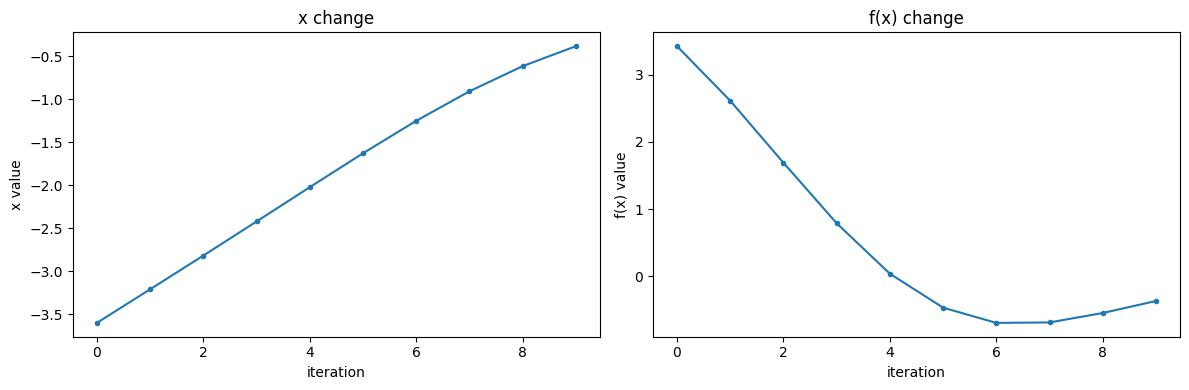

In [629]:
learning_rate = 0.4
iterations = 10
beta1 = 0.9
beta2 = 0.999
x_init = -4
x_final, x_history, func_history = Adam(x_init,learning_rate,iterations,beta1,beta2)
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')

plt.subplot(122)
plt.plot(func_history,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')

plt.tight_layout()
plt.show()


下面更改迭代次数为50次，分别研究各算法的变化情况。首先导入需要用到的库

In [630]:
import numpy as np
import matplotlib.pyplot as plt

给定通用的各超参数

In [631]:
learning_rate = 0.4
iterations = 50
beta1 = 0.99
beta2 = 0.999
x_init = -4
decay_rate = 0.9
momentum_rate = 0.9
epsilon = 1e-6

给出各算法的对应情况

In [632]:
learning_rate = 0.4
iterations = 50
x_init = -4
alpha = 0.9
momentum_rate = 0.9
beta1 = 0.99
beta2 = 0.999
x_final_1, x_history_1, func_history_1 = gradient_descent(func, derivative_func, x_init, learning_rate, iterations)
x_final_2, x_history_2, func_history_2 = random_gradient_descent(learning_rate,iterations)
x_final_3, x_history_3, func_history_3 = Adagrad(learning_rate,iterations)
x_final_4, x_history_4, func_history_4 = RMSprop(x_init,learning_rate,alpha,iterations)
x_final_5, x_history_5, func_history_5 = momentum(x_init,learning_rate,iterations,momentum_rate)
x_final_6, x_history_6, func_history_6 = Adam(x_init,learning_rate,iterations,beta1,beta2)

绘图使上述结果可视化

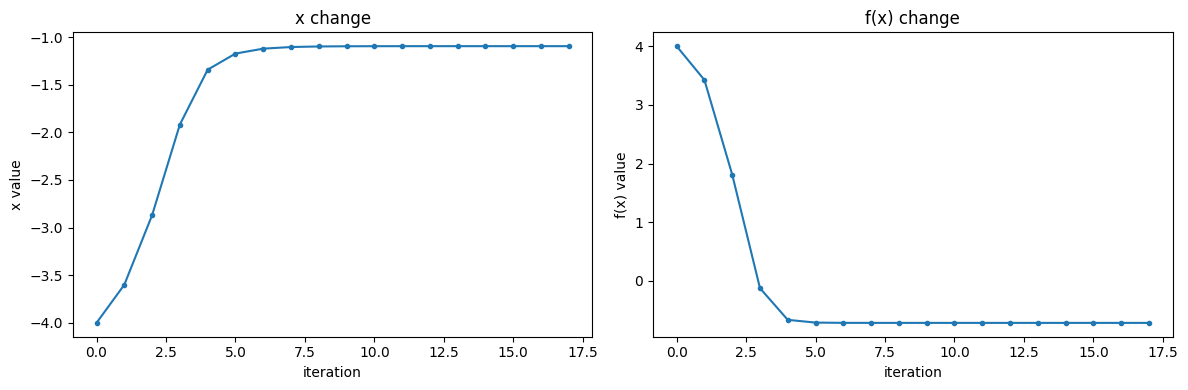

In [633]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_1, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_1,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

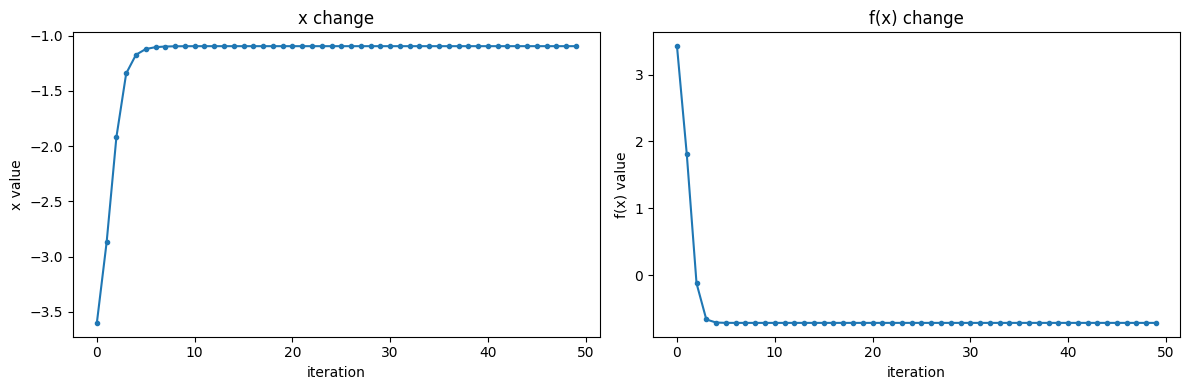

In [634]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_2, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_2,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

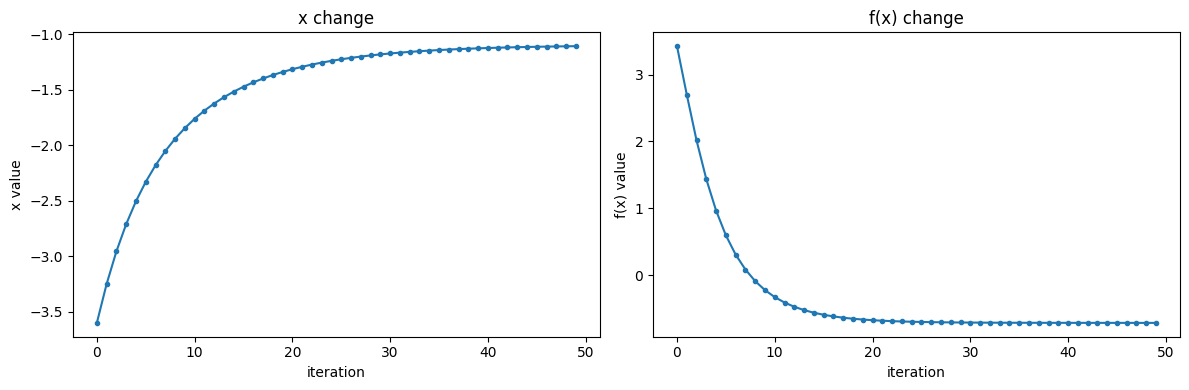

In [635]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_3, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_3,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

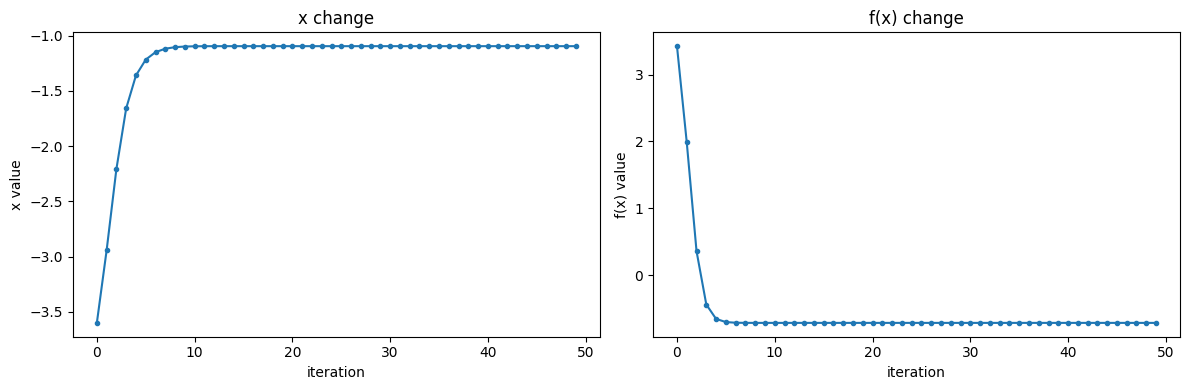

In [636]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_4, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_4,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

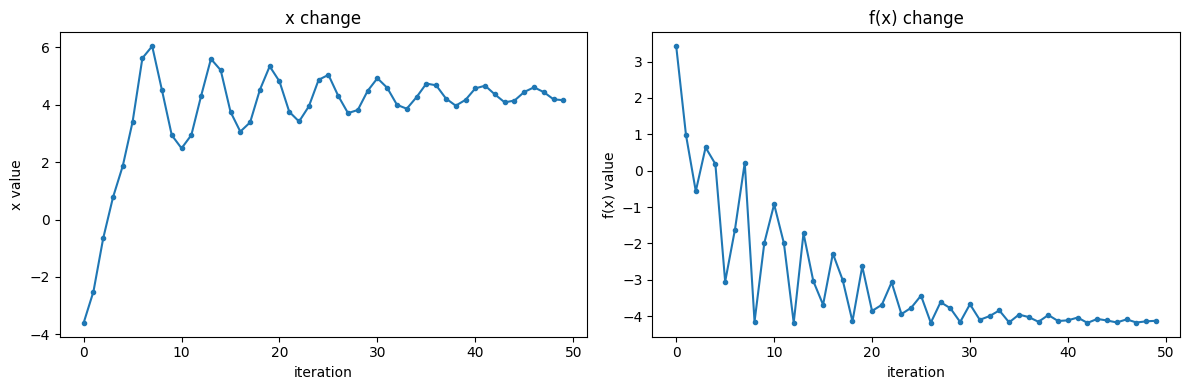

In [637]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_5, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_5,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

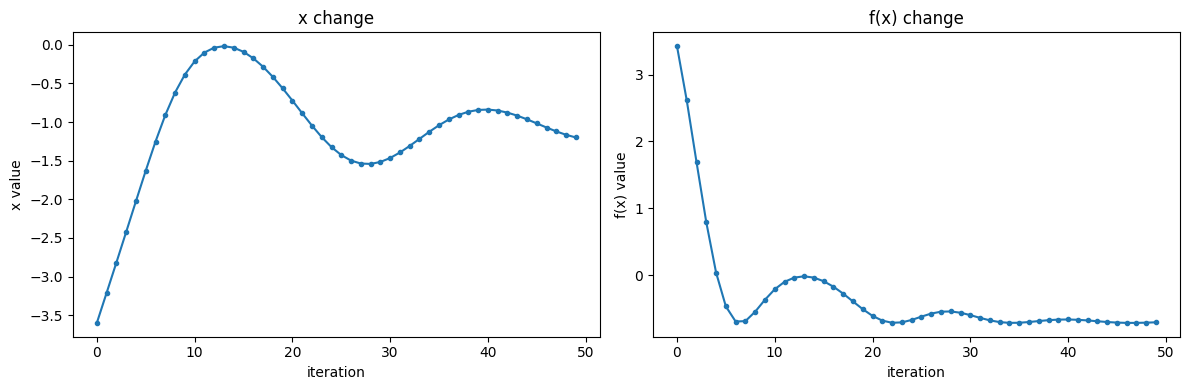

In [638]:
# 绘制图形
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_history_6, marker='o',markersize=3,label='x',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('x value')
plt.title('x change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.subplot(122)
plt.plot(func_history_6,marker='o',markersize=3, label='f(x)',linestyle='-')
plt.xlabel('iteration')
plt.ylabel('f(x) value')
plt.title('f(x) change')
# plt.xticks(np.arange(iterations), np.arange(iterations).astype(int))

plt.tight_layout()
plt.show()

比较可以发现如下结论:
- 随机梯度下降法的变化速度快于梯度下降法，但是随机梯度下降法的变化幅度较大，不稳定，而梯度下降法的变化幅度较小，稳定。
- 随机梯度下降法和梯度下降法都需要手动调节学习率，而其余几种方法则不需要
- Adagrad和RMSProp均可以自动调节学习率，但Adagrad可能会因为累计历史梯度信息导致学习率过早衰减，而RMSProp则可以解决这个问题，更加的稳定。但RMSProp仍然需要手动调整衰减率
- 动量法虽然可以加速收敛，但在某些情况下会导致超调
- Adam法结合了RMSProp和动量法的优点，同时又可以自动调整学习率，是一种比较好的方法。但同时也有着需要调节众多参数的问题。
- 从上述结果可以看出，当迭代次数较少时，各算法的变化情况差异不大，但当迭代次数增加时，各算法的差异逐渐显现出来，这是因为当迭代次数较少时，各算法的学习率都较大，故各算法的变化情况差异不大，但当迭代次数增加时，各算法的学习率逐渐减小，故各算法的变化情况差异逐渐显现出来。
- 另外，修改Adam算法的beta1参数后可以发现，当beta1较小时，Adam算法的变化情况与梯度下降法相似，当beta1较大时，Adam算法的变化情况与RMSProp相似，这是因为当beta1较小时，Adam算法的动量项较小，故变化情况与梯度下降法相似，当beta1较大时，Adam算法的动量项较大，故变化情况与RMSProp相似。
- 以上结论不一定正确，仅是上述实验结果的反映。